---

### **Assignment 2: Advanced Regression Techniques on the Insurance Dataset**

#### **Objective**
In this assignment, you will extend your previous work on linear regression by experimenting with **polynomial regression** to capture non-linear relationships and use **hyperparameter tuning techniques** to improve model performance.

---

### **Instructions**

#### 🔹 **Part 1: Polynomial Regression (10 Marks)**
1. Use the same **insurance dataset** from Assignment 1.
2. Perform **feature engineering** to include **polynomial features** (e.g., age², BMI², age × BMI, etc.).
3. Fit a **Polynomial Regression** model using `sklearn`'s `PolynomialFeatures` and `LinearRegression`.
4. Compare the performance of the polynomial regression model with your previous linear regression model using:
   - R² score
   - RMSE or MAE
   - Train vs. Test performance
5. Comment on **overfitting/underfitting**, if any.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Python/Colab Notebooks/Python EDA/insurance.csv"
df = pd.read_csv(data_path)

Mounted at /content/drive


In [ ]:
#read csv file
df=pd.read_csv(data_path)
df.head(20)

In [4]:
# EDA: Summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[~df.map(np.isreal).all(1)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

In [ ]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex_LabelEncoder'] = le.fit_transform(df['sex'])
df['smoker_LabelEncoder'] = le.fit_transform(df['smoker'])
df['region_LabelEncoder'] = le.fit_transform(df['region'])


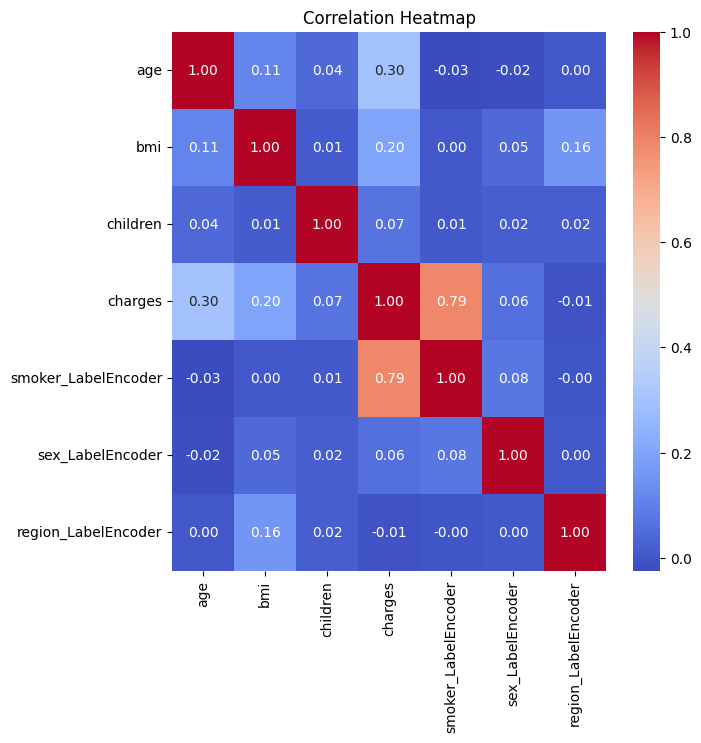

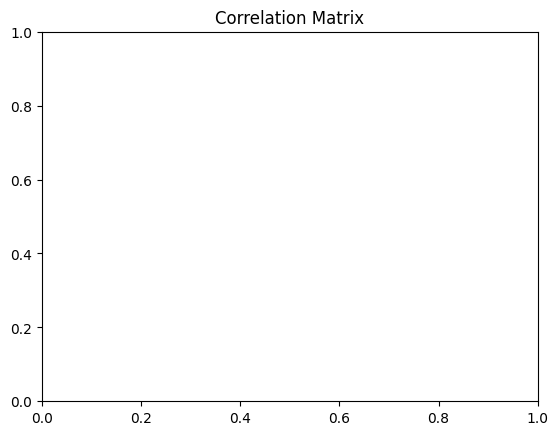

In [7]:
# EDA: Correlation matrix
plt.figure(figsize=(7, 7))
#sns.heatmap(df[['age', 'bmi','children','charges', 'smoker_LabelEncoder']].corr(), annot=True, cmap='coolwarm')
sns.heatmap(df[['age', 'bmi', 'children','charges', 'smoker_LabelEncoder', 'sex_LabelEncoder', 'region_LabelEncoder']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
plt.title('Correlation Matrix')
plt.show()

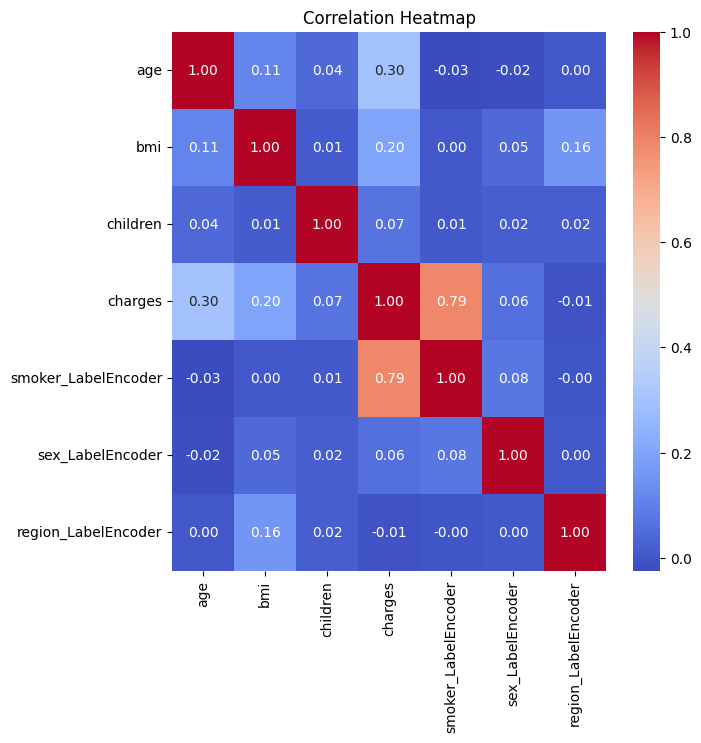

In [8]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit_transform on the original columns and assign back to the DataFrame
df['sex_LabelEncoder'] = le.fit_transform(df['sex'])
df['smoker_LabelEncoder'] = le.fit_transform(df['smoker'])
df['region_LabelEncoder'] = le.fit_transform(df['region'])

# EDA: Correlation matrix
plt.figure(figsize=(7, 7))
#sns.heatmap(df[['age', 'bmi','children','charges', 'smoker_LabelEncoder']].corr(), annot=True, cmap='coolwarm')
sns.heatmap(df[['age', 'bmi', 'children','charges', 'smoker_LabelEncoder', 'sex_LabelEncoder', 'region_LabelEncoder']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


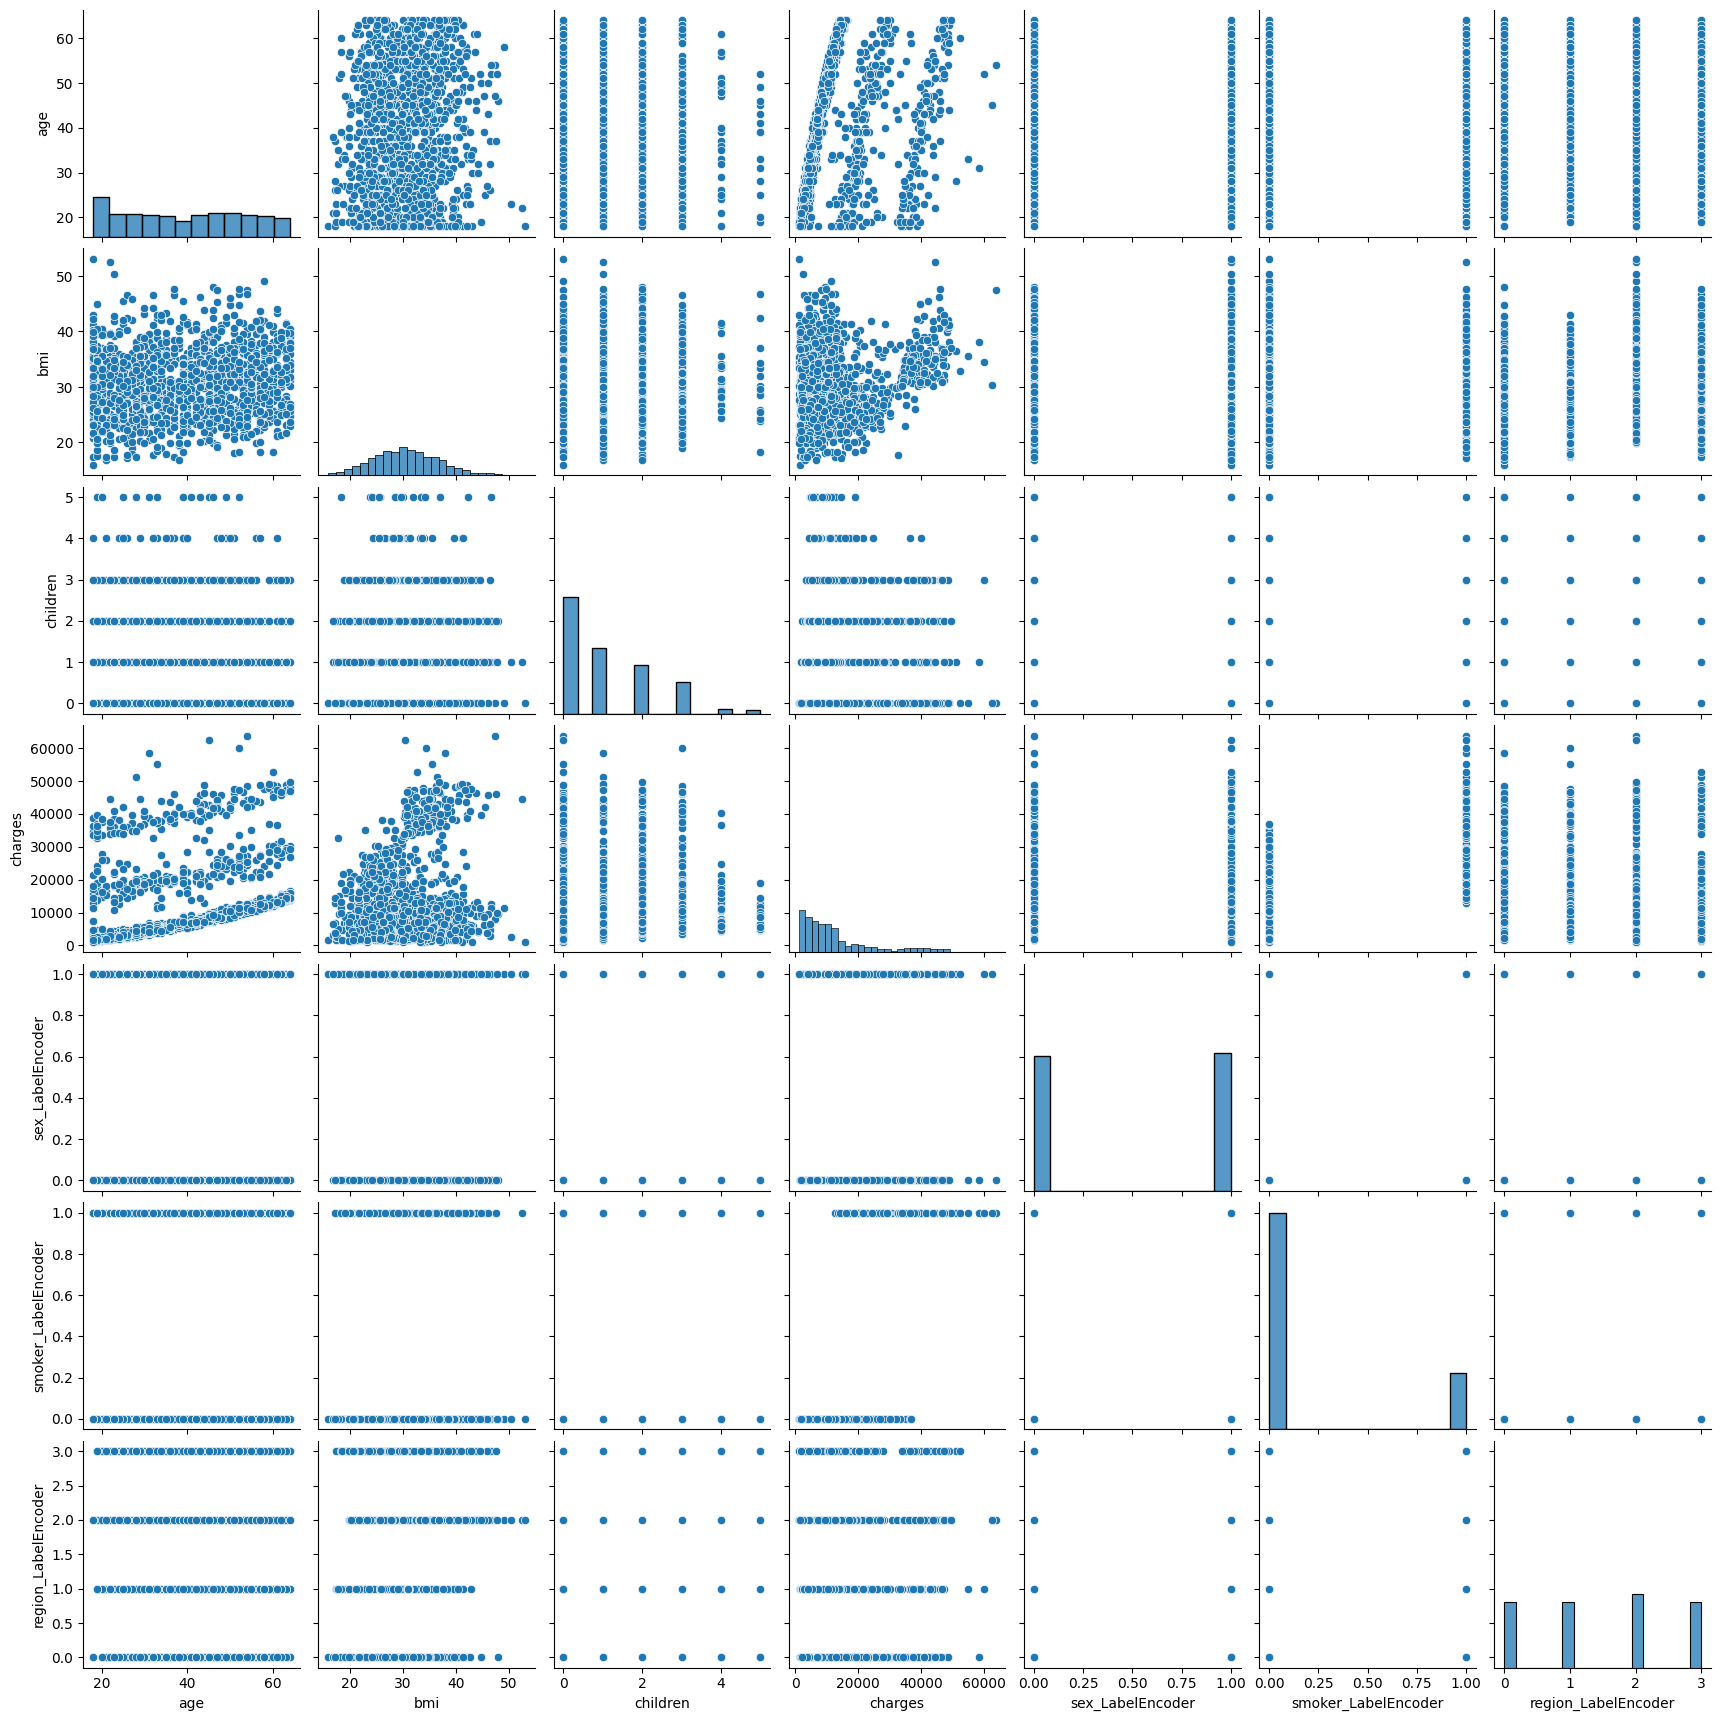

In [9]:
# EDA: Pairplot of features
sns.pairplot(df)
plt.show()

In [11]:
# Prepare the data by selecting relevant features

X = df.drop(columns=['sex', 'children', 'region', 'smoker'])
y = df['charges']

In [ ]:
df.head()

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [16]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 1.0)

In [17]:
# Calculate performance metrics for both training and test sets
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [18]:
# Training performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])

In [19]:
# Test performance
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])

In [20]:
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Training Performance:
Mean Absolute Error (MAE): $0.00
Root Mean Squared Error (RMSE): $0.00
R-squared (R²): 1.00
Adjusted R-squared (Adj. R²): 1.00

Test Performance:
Mean Absolute Error (MAE): $0.00
Root Mean Squared Error (RMSE): $0.00
R-squared (R²): 1.00
Adjusted R-squared (Adj. R²): 1.00


In [21]:
# Compare training and test performance
print("\nPerformance Comparison:")
print(f"Training vs Test MAE: ${mae_train:.2f} vs ${mae_test:.2f}")
print(f"Training vs Test RMSE: ${rmse_train:.2f} vs ${rmse_test:.2f}")
print(f"Training vs Test R²: {r2_train:.2f} vs {r2_test:.2f}")
print(f"Training vs Test Adj. R²: {adj_r2_train:.2f} vs {adj_r2_test:.2f}")


Performance Comparison:
Training vs Test MAE: $0.00 vs $0.00
Training vs Test RMSE: $0.00 vs $0.00
Training vs Test R²: 1.00 vs 1.00
Training vs Test Adj. R²: 1.00 vs 1.00


### Observations:
- 1. The R² value of 1 indicates that the model explains 100% of the variance in Insirance charges, which suggests a good fit.
- 2. The RMSE of $0.00 suggests that the model's predictions perfectly matches actual values.
- 3. The heatmap shows strong correlations between the target variable (Cargee) and features like smoker and moderate corelation with Age and BMI.
- 4. No missing values were detected in the dataset, which means the data is complete and ready for modeling.
- 5. Further model improvement could be considered by exploring polynomial regression, feature engineering, or regularization techniques.


### Training Performance:
- **Mean Absolute Error (MAE):** $0.00
  - **Interpretation:** On average, the model's predictions perfectly match with the actual values. This is a measure of the average absolute error in the model's predictions.
  
- **Root Mean Squared Error (RMSE):** $0.00
  - **Interpretation:** The RMSE of 0 suggests that the actual and the predicted values match precisely. RMSE gives more weight to larger errors due to squaring, so it’s useful for understanding the magnitude of the larger errors.

- **R-squared (R²):** 1
  - **Interpretation:** The model explains 100% of the variance in the target variable. This is a high R² value, indicating a strong fit of the model to the training data.

- **Adjusted R-squared (Adj. R²):** 1
  - **Interpretation:** Adjusted R² accounts for the number of predictors in the model and provides a more accurate measure of goodness-of-fit. The high value suggests that the model is well-specified and the number of predictors is appropriate.

### Test Performance:
- Same interprestratons apply for the Test perfromace as well as all values are same for Train and Test performance

### Overall Interpretation:
1. **Good Model Fit:** The high R² and adjusted R² values for both training and test sets suggest that the model fits the data well and generalizes effectively to new data.
2. **Error Metrics:** Both MAE and RMSE are fairly consistent between training and test sets, indicating that the model performs similarly on both datasets. The slightly higher error metrics in the training set compared to the test set might be due to overfitting or simply variability in the data.
3. **No Major Signs of Overfitting:** Since the test performance metrics are close to the training metrics, there are no major signs of overfitting. The model's ability to predict on unseen data is strong, as evidenced by the similar performance metrics.


#### 🔹 **Part 2: Regularization (Ridge and Lasso) (10 Marks)**
1. Apply **Ridge** and **Lasso** regression to the polynomial features.
2. Use **cross-validation** to evaluate model performance.
3. Explain the effect of **regularization** in controlling overfitting, and compare model coefficients.



#Polynomial Regression
 Step 1: Choose the polynomial degree

In [22]:
degree = 2
poly = PolynomialFeatures(degree=degree)  # This transforms input features into polynomial features

🔹 Step 2: Transform training and test data

In [23]:

X_train_poly = poly.fit_transform(X_train)  # Fit and transform training data
X_test_poly = poly.transform(X_test)        # Only transform test data (NO fitting here!)

Step 3: Check transformed features

In [24]:
X_train_poly  # This shows the new feature set after transformation

array([[ 1.   , 61.   , 31.16 , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 46.   , 27.6  , ...,  0.   ,  0.   ,  9.   ],
       [ 1.   , 54.   , 31.9  , ...,  0.   ,  0.   ,  4.   ],
       ...,
       [ 1.   , 58.   , 25.175, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 37.   , 47.6  , ...,  1.   ,  3.   ,  9.   ],
       [ 1.   , 55.   , 29.9  , ...,  0.   ,  0.   ,  9.   ]])

In [ ]:
X_train_poly.shape

In [ ]:
df.columns

#Lets cross check the transformed features

In [ ]:
'''import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Select only numerical features (exclude 'Price' and 'Address')
input_features = ['age', 'sex_LabelEncoder', 'bmi', 'children_LabelEncoder', 'smoker_LabelEncoder', 'region_LabelEncoder',
                       'charges']  # ✅ Only numeric features

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)

# Transform training data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # ✅ Only transform test data (NO fitting here!)

# Get feature names correctly
feature_names = poly.get_feature_names_out(input_features=input_features)

# Convert transformed data into a DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)

# Display first few rows
X_train_poly_df.head()'''

In [25]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Get the actual feature names from X_train (assuming it's a DataFrame)
input_features = X_train.columns.tolist()

# Create polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)

# Transform training data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # ✅ Only transform test data (NO fitting here!)

# Get feature names correctly, using the correct input_features
feature_names = poly.get_feature_names_out(input_features=input_features)

# Convert transformed data into a DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)

# Display first few rows
X_train_poly_df.head()

,1,age,bmi,charges,sex_LabelEncoder,smoker_LabelEncoder,region_LabelEncoder,age^2,age bmi,age charges,...,charges^2,charges sex_LabelEncoder,charges smoker_LabelEncoder,charges region_LabelEncoder,sex_LabelEncoder^2,sex_LabelEncoder smoker_LabelEncoder,sex_LabelEncoder region_LabelEncoder,smoker_LabelEncoder^2,smoker_LabelEncoder region_LabelEncoder,region_LabelEncoder^2
0,1.0,61.0,31.160,13429.03540,0.0,0.0,1.0,3721.0,1900.760,8.191712e+05,...,1.803390e+08,0.00000,0.00000,13429.03540,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,46.0,27.600,24603.04837,1.0,0.0,3.0,2116.0,1269.600,1.131740e+06,...,6.053100e+08,24603.04837,0.00000,73809.14511,1.0,0.0,3.0,0.0,0.0,9.0
2,1.0,54.0,31.900,27322.73386,0.0,0.0,2.0,2916.0,1722.600,1.475428e+06,...,7.465318e+08,0.00000,0.00000,54645.46772,0.0,0.0,0.0,0.0,0.0,4.0
3,1.0,55.0,30.685,42303.69215,1.0,1.0,0.0,3025.0,1687.675,2.326703e+06,...,1.789602e+09,42303.69215,42303.69215,0.00000,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,25.0,45.540,42112.23560,1.0,1.0,2.0,625.0,1138.500,1.052806e+06,...,1.773440e+09,42112.23560,42112.23560,84224.47120,1.0,1.0,2.0,1.0,2.0,4.0


In [ ]:
X_train_poly_df.columns

In [ ]:
X_train_poly_df.shape

 Step 4: Train a Linear Regression model on polynomial features

In [26]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)  # Model learns the best polynomial coefficients

LinearRegression()

Step 5: Make predictions

In [27]:
y_train_pred = poly_model.predict(X_train_poly)  # Predictions on training data
y_test_pred = poly_model.predict(X_test_poly)    # Predictions on test data

🔹 Step 6: Store test predictions for evaluation

In [28]:
y_test_pred_poly = y_test_pred

In [29]:
# 🔹 Function to Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [30]:
# 🔹 Training Performance Metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, X_train.shape[0], X_train_poly.shape[1] - 1)

In [31]:
# 🔹 Testing Performance Metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, X_test.shape[0], X_test_poly.shape[1] - 1)


🔹 Training Performance:
Mean Absolute Error (MAE): $0.00
Root Mean Squared Error (RMSE): $0.00
R-squared (R²): 1.00
Adjusted R-squared (Adj. R²): 1.00

🔹 Test Performance:
Mean Absolute Error (MAE): $0.00
Root Mean Squared Error (RMSE): $0.00
R-squared (R²): 1.00
Adjusted R-squared (Adj. R²): 1.00


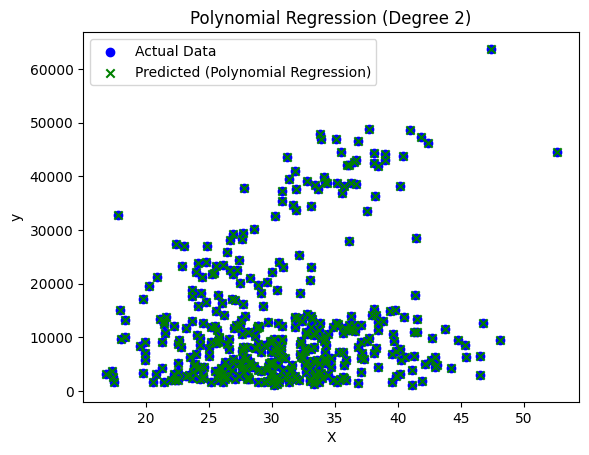

In [32]:
# 🔹 Print Performance Metrics
print(f"\n🔹 Training Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\n🔹 Test Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")

# 🔹 Visualizing Polynomial Regression Fit
plt.scatter(X_test.iloc[:,1], y_test, color='blue', label='Actual Data')
plt.scatter(X_test.iloc[:,1], y_test_pred.flatten(), color='green', marker='x', label='Predicted (Polynomial Regression)')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title(f"Polynomial Regression (Degree {degree})")
plt.show()

In [33]:
# Ridge and Lasso Regression Example with Non-Linear Synthetic Data

## Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,  r2_score



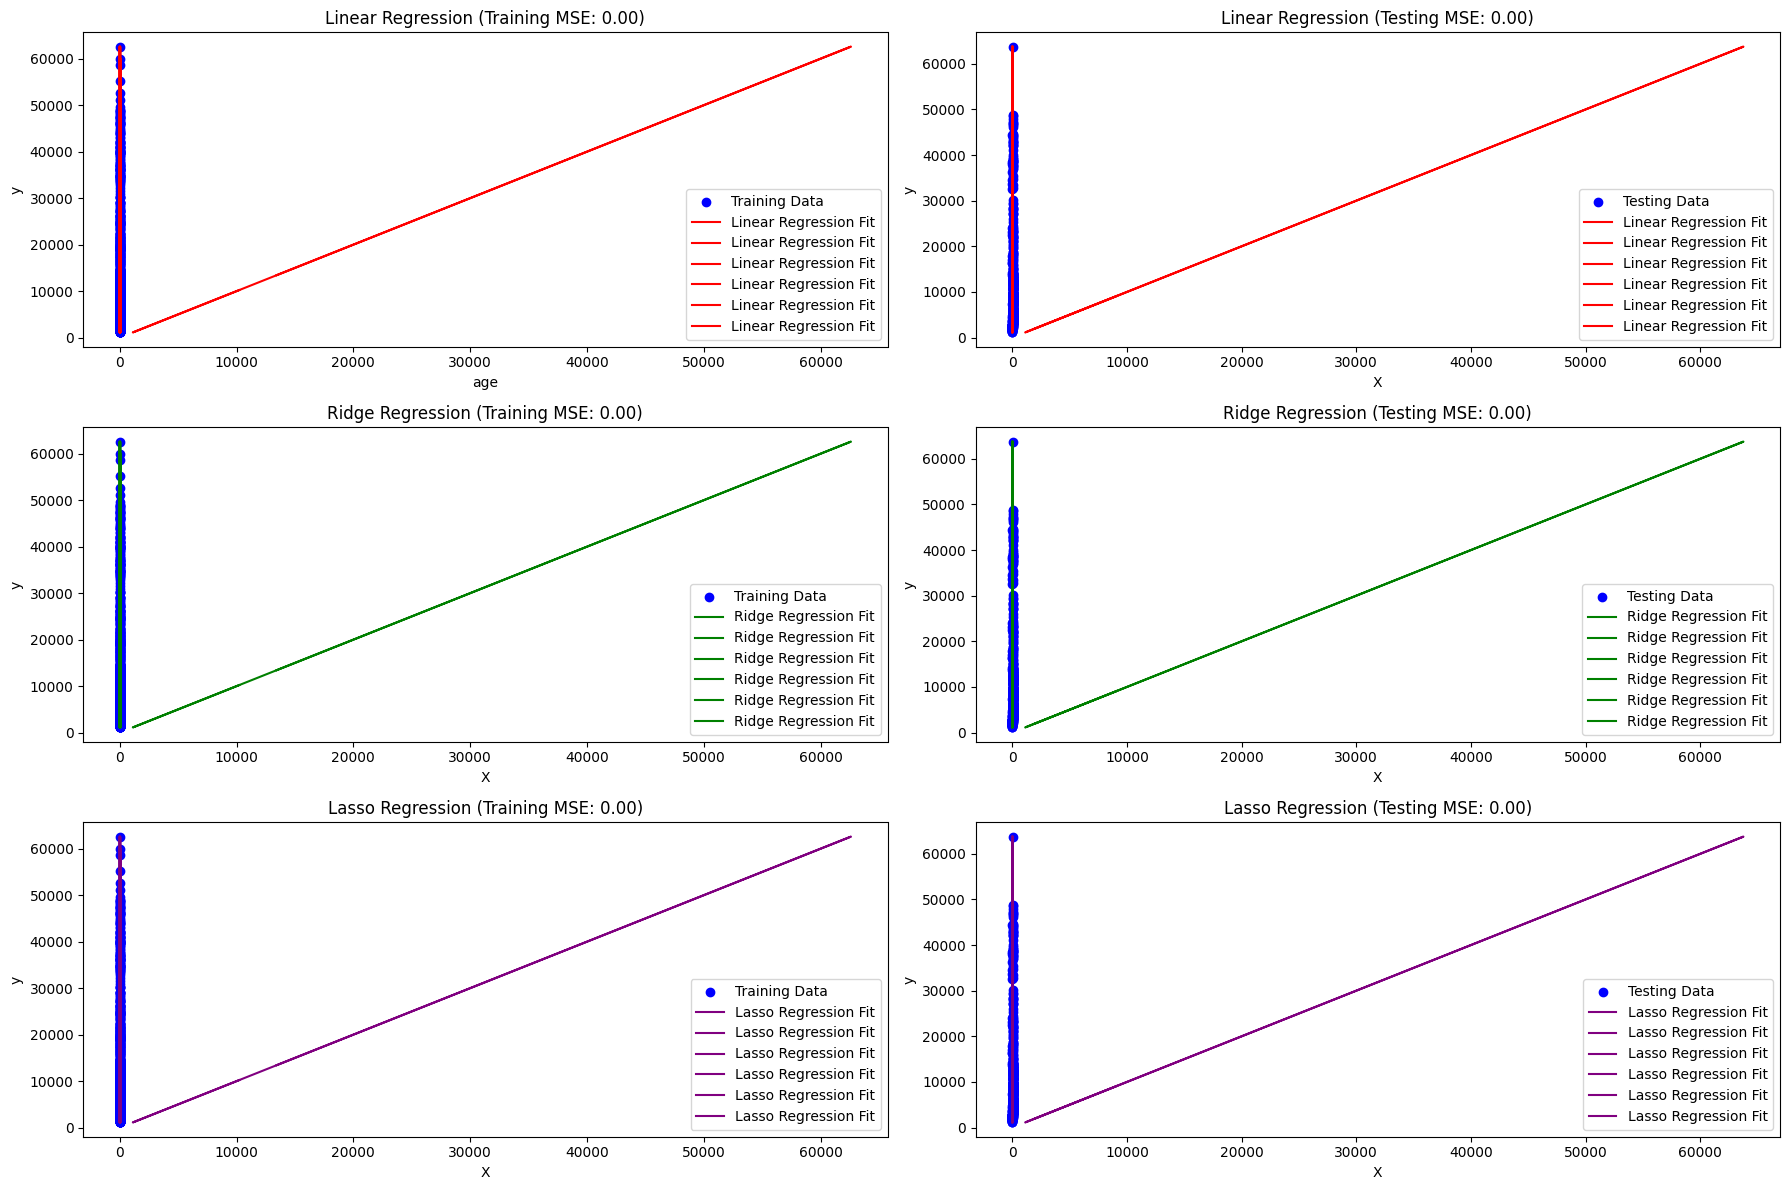

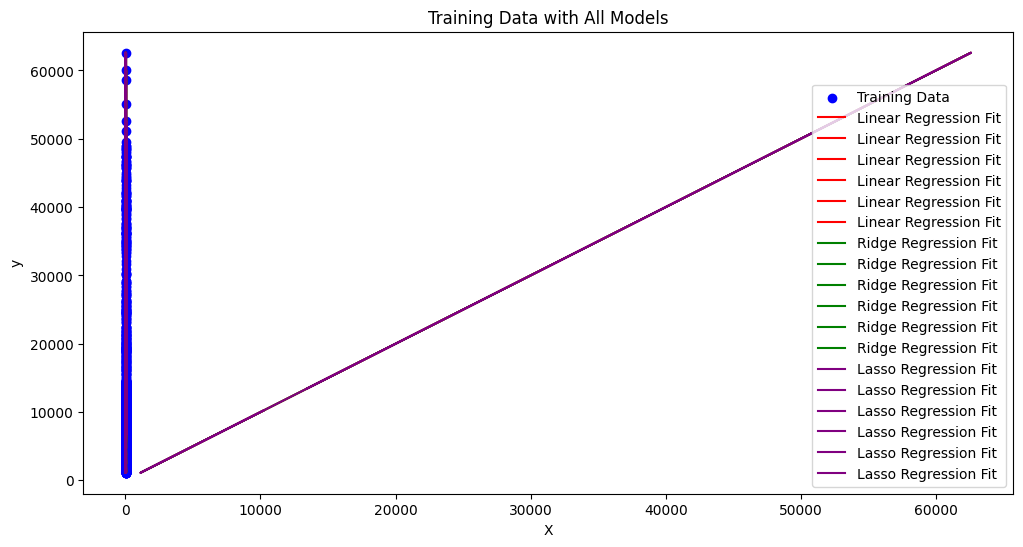

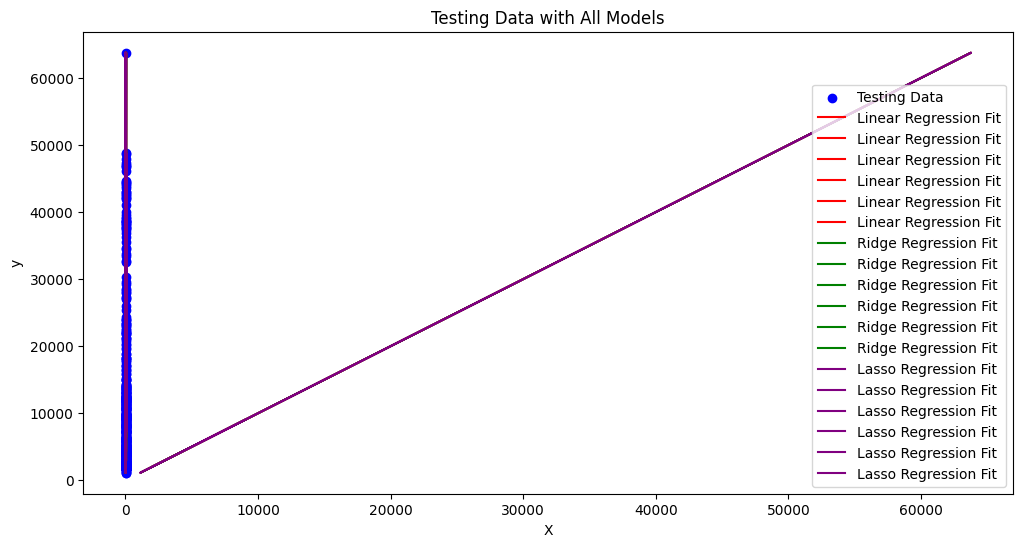

Linear Regression (No Regularization) MSE:
Training MSE: 0.00
Testing MSE: 0.00
Slope (Coefficient): [ 1.06923378e-13 -6.26165786e-14  1.00000000e+00  1.81662899e-13
  8.72523966e-13 -4.01431529e-14]
Intercept: 0.0

Training Acc: 1.00
Training Acc: 1.00
Ridge Regression MSE:
Training MSE: 0.00
Testing MSE: 0.00
Slope (Coefficient): [ 7.29954444e-09  9.51837114e-09  1.00000000e+00  3.67822924e-09
  6.50352352e-07 -9.36684449e-09]
Intercept: -3.301083779660985e-07

Training Acc: 1.00
Training Acc: 1.00
Lasso Regression MSE:
Training MSE: 0.00
Testing MSE: 0.00
Slope (Coefficient): [0. 0. 1. 0. 0. 0.]
Intercept: 1.8268838175572455e-07
Training Acc: 1.00
Training Acc: 1.00


In [34]:
# Assuming X and y are your original dataset features and target
# Fit the Linear Regression model with the correct number of features
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Fit on data with 6 features
# Make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Now you can score the model
linTrainscore = lin_reg.score(X_train, y_train)
linTestscore = lin_reg.score(X_test, y_test)



# Calculate mean squared error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Extract coefficients
coef_lin_reg = lin_reg.coef_
intercept_lin_reg = lin_reg.intercept_

## Ridge Regression (L2 Regularization)
# Set the regularization parameter
alpha_ridge = 1.0

# Create and train the Ridge regression model
ridge_reg = Ridge(alpha=alpha_ridge)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_ridge_pred_train = ridge_reg.predict(X_train)
y_ridge_pred_test = ridge_reg.predict(X_test)


#score Training and Testing

RidTrainscore = ridge_reg.score(X_train, y_train)
RidTestscore = ridge_reg.score(X_test, y_test)




# Calculate mean squared error (MSE) for Ridge regression
mse_ridge_train = mean_squared_error(y_train, y_ridge_pred_train)
mse_ridge_test = mean_squared_error(y_test, y_ridge_pred_test)

# Extract coefficients
coef_ridge_reg = ridge_reg.coef_
intercept_ridge_reg = ridge_reg.intercept_

## Lasso Regression (L1 Regularization)
# Set the regularization parameter
alpha_lasso = 0.002

# Create and train the Lasso regression model
lasso_reg = Lasso(alpha=alpha_lasso)
lasso_reg.fit(X_train, y_train)

# Make predictions
y_lasso_pred_train = lasso_reg.predict(X_train)
y_lasso_pred_test = lasso_reg.predict(X_test)


#score Training and Testing

LasTrainscore = lasso_reg.score(X_train, y_train)
LasTestscore = lasso_reg.score(X_test, y_test)


# Calculate mean squared error (MSE) for Lasso regression
mse_lasso_train = mean_squared_error(y_train, y_lasso_pred_train)
mse_lasso_test = mean_squared_error(y_test, y_lasso_pred_test)

# Extract coefficients
coef_lasso_reg = lasso_reg.coef_
intercept_lasso_reg = lasso_reg.intercept_

# Plot the results
plt.figure(figsize=(18, 12))

# Linear Regression Plots
plt.subplot(3, 2, 1)
plt.scatter(X_train.iloc[:,0], y_train, color="blue", label="Training Data")
plt.plot(X_train, y_pred_train, color="red", label="Linear Regression Fit")
plt.title(f"Linear Regression (Training MSE: {mse_train:.2f})")
plt.xlabel(X_train.columns[0])
plt.ylabel("y")
plt.legend()

plt.subplot(3, 2, 2)
plt.scatter(X_test.iloc[:,0], y_test, color="blue", label="Testing Data")
plt.plot(X_test, y_pred_test, color="red", label="Linear Regression Fit")
plt.title(f"Linear Regression (Testing MSE: {mse_test:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Ridge Regression Plots
plt.subplot(3, 2, 3)
plt.scatter(X_train.iloc[:,0], y_train, color="blue", label="Training Data")
plt.plot(X_train, y_ridge_pred_train, color="green", label="Ridge Regression Fit")
plt.title(f"Ridge Regression (Training MSE: {mse_ridge_train:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(3, 2, 4)
plt.scatter(X_test.iloc[:,0], y_test, color="blue", label="Testing Data")
plt.plot(X_test, y_ridge_pred_test, color="green", label="Ridge Regression Fit")
plt.title(f"Ridge Regression (Testing MSE: {mse_ridge_test:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Lasso Regression Plots
plt.subplot(3, 2, 5)
plt.scatter(X_train.iloc[:,0], y_train, color="blue", label="Training Data")
plt.plot(X_train, y_lasso_pred_train, color="purple", label="Lasso Regression Fit")
plt.title(f"Lasso Regression (Training MSE: {mse_lasso_train:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(3, 2, 6)
plt.scatter(X_test.iloc[:,0], y_test, color="blue", label="Testing Data")
plt.plot(X_test, y_lasso_pred_test, color="purple", label="Lasso Regression Fit")
plt.title(f"Lasso Regression (Testing MSE: {mse_lasso_test:.2f})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

# Combined Training Data Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_train.iloc[:,0], y_train, color="blue", label="Training Data")
plt.plot(X_train, y_pred_train, color="red", label="Linear Regression Fit")
plt.plot(X_train, y_ridge_pred_train, color="green", label="Ridge Regression Fit")
plt.plot(X_train, y_lasso_pred_train, color="purple", label="Lasso Regression Fit")
plt.title("Training Data with All Models")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Combined Testing Data Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_test.iloc[:,0], y_test, color="blue", label="Testing Data")
plt.plot(X_test, y_pred_test, color="red", label="Linear Regression Fit")
plt.plot(X_test, y_ridge_pred_test, color="green", label="Ridge Regression Fit")
plt.plot(X_test, y_lasso_pred_test, color="purple", label="Lasso Regression Fit")
plt.title("Testing Data with All Models")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Comparing Errors and Slopes Before and After Ridge and Lasso Regularization
print("Linear Regression (No Regularization) MSE:")
print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Slope (Coefficient): {coef_lin_reg}")
print(f"Intercept: {intercept_lin_reg}\n")
print(f"Training Acc: {linTrainscore:.2f}")
print(f"Training Acc: {linTrainscore:.2f}")

print("Ridge Regression MSE:")
print(f"Training MSE: {mse_ridge_train:.2f}")
print(f"Testing MSE: {mse_ridge_test:.2f}")
print(f"Slope (Coefficient): {coef_ridge_reg}")
print(f"Intercept: {intercept_ridge_reg}\n")
print(f"Training Acc: {RidTrainscore:.2f}")
print(f"Training Acc: {RidTrainscore:.2f}")


print("Lasso Regression MSE:")
print(f"Training MSE: {mse_lasso_train:.2f}")
print(f"Testing MSE: {mse_lasso_test:.2f}")
print(f"Slope (Coefficient): {coef_lasso_reg}")
print(f"Intercept: {intercept_lasso_reg}")
print(f"Training Acc: {LasTrainscore:.2f}")
print(f"Training Acc: {LasTrainscore:.2f}")

In [ ]:
df.head()

Step 1: Import Necessary Libraries and load the data

In [35]:
#k-fold Cross-Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
#df.head()
X = df[['age', 'sex_LabelEncoder','bmi', 'region_LabelEncoder', 'smoker_LabelEncoder']]
y = df['charges']



Step 3: Create SVM Classifier

In [36]:
svm_regressor = SVR(kernel='linear')

Step 4: Define the Number of Folds

In [37]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

Step 5: Perform K-Fold Cross-Validation

In [38]:
cross_val_results = cross_val_score(svm_regressor, X, y, cv=kf)

Step 6: Evaluation Metrics

In [39]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [-0.07074386 -0.1854049  -0.15356442 -0.18145043 -0.1161688 ]
Mean Accuracy: -0.14146648179101895


#Explain the effect of regularization in controlling overfitting, and compare model coefficients.

In [ ]:
#Explain the effect of regularization in controlling overfitting, and compare model coefficients.
#Regularization helps models focus on underlying patterns instead of memorizing noise in the training data.
#Improves Interpretability: L1 (Lasso) regularization simplifies models by reducing less important feature coefficients to zero


#### 🔹 **Part 3: Hyperparameter Tuning (10 Marks )**
1. Use `GridSearchCV` or `RandomizedSearchCV` to find the optimal value of:
   - `alpha` (regularization strength) for Ridge/Lasso
   - Polynomial **degree**
2. Evaluate and report the best combination of hyperparameters.
3. Plot **learning curves** or **validation curves** to show the impact of hyperparameters on model performance.


GRID SEARCH

In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR  # Import SVR for regression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics
import pandas as pd

# Load a sample dataset

X = df[['age', 'sex_LabelEncoder','bmi', 'region_LabelEncoder', 'smoker_LabelEncoder']]
y = df['charges']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model - Use SVR for regression
model = SVR()

# Define the hyperparameters and the range of values to test
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# 1. GridSearchCV Approach
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Best params and score from GridSearchCV
best_params_gs = grid_search.best_params_
best_score_gs = grid_search.best_score_
print(f"GridSearchCV Best Parameters: {best_params_gs}")
print(f"GridSearchCV Best Cross-Validation Score: {best_score_gs:.4f}")

# 2. Manual KFold Cross-Validation Approach
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_score_kf = -np.inf
best_params_kf = None

# Iterate over all combinations of parameters
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            scores = []
            for train_idx, val_idx in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
                y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

                model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)
                model.fit(X_train_fold, y_train_fold)
                score = model.score(X_val_fold, y_val_fold)
                scores.append(score)

            mean_score = np.mean(scores)
            if mean_score > best_score_kf:
                best_score_kf = mean_score
                best_params_kf = {'C': C, 'gamma': gamma, 'kernel': kernel}

print(f"KFold Cross-Validation Best Parameters: {best_params_kf}")
print(f"KFold Cross-Validation Best Score: {best_score_kf:.4f}")

# Compare the best models on the test set
best_model_gs = grid_search.best_estimator_
best_model_kf = SVC(**best_params_kf, random_state=42).fit(X_train, y_train)

y_pred_gs = best_model_gs.predict(X_test)
y_pred_kf = best_model_kf.predict(X_test)

test_score_gs = accuracy_score(y_test, y_pred_gs)
test_score_kf = accuracy_score(y_test, y_pred_kf)

print(f"GridSearchCV Test Set Accuracy: {test_score_gs:.4f}")
print(f"KFold Cross-Validation Test Set Accuracy: {test_score_kf:.4f}")

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR  # Import SVR for regression
#from sklearn.datasets import load_iris # Not needed for this task
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # Import regression metrics
import pandas as pd

# Load a sample dataset

X = df[['age', 'sex_LabelEncoder','bmi', 'region_LabelEncoder', 'smoker_LabelEncoder']]
y = df['charges']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model - Use SVR for regression
model = SVR()

# Define the hyperparameters and the range of values to test
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# 1. GridSearchCV Approach
# Use SVR instead of SVC for regression
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Best params and score from GridSearchCV
best_params_gs = grid_search.best_params_
best_score_gs = grid_search.best_score_
print(f"GridSearchCV Best Parameters: {best_params_gs}")
print(f"GridSearchCV Best Cross-Validation Score: {best_score_gs:.4f}")

# 2. Manual KFold Cross-Validation Approach
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_score_kf = -np.inf
best_params_kf = None

# Iterate over all combinations of parameters
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            scores = []
            for train_idx, val_idx in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
                y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

                model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)
                model.fit(X_train_fold, y_train_fold)
                score = model.score(X_val_fold, y_val_fold)
                scores.append(score)

            mean_score = np.mean(scores)
            if mean_score > best_score_kf:
                best_score_kf = mean_score
                best_params_kf = {'C': C, 'gamma': gamma, 'kernel': kernel}

print(f"KFold Cross-Validation Best Parameters: {best_params_kf}")
print(f"KFold Cross-Validation Best Score: {best_score_kf:.4f}")

# Compare the best models on the test set
best_model_gs = grid_search.best_estimator_
best_model_kf = SVC(**best_params_kf, random_state=42).fit(X_train, y_train)

y_pred_gs = best_model_gs.predict(X_test)
y_pred_kf = best_model_kf.predict(X_test)

test_score_gs = accuracy_score(y_test, y_pred_gs)
test_score_kf = accuracy_score(y_test, y_pred_kf)

print(f"GridSearchCV Test Set Accuracy: {test_score_gs:.4f}")
print(f"KFold Cross-Validation Test Set Accuracy: {test_score_kf:.4f}")

KeyboardInterrupt: 

#### 🔹 **Part 4: Final Model Evaluation (10 Marks)**
1. Select the best model based on cross-validation results.
2. Evaluate it on the **test set** and compare with your previous models.
3. Provide a short summary: Which model worked best? Why?

---

### **Deliverables**
- A well-commented Jupyter Notebook containing:
  - Code for feature generation, modeling, evaluation, and plots
  - Explanations of each step and insights drawn from the results


---


### **Optional Bonus Tasks**
- Try using `PolynomialFeatures(interaction_only=True)`
- Visualize how regularization affects coefficients (bar plot of weights)
- Try using `Pipeline` for clean model building

---